# Análise de Componentes Principais (ACP)

ACP usando dados de notas (bivariado, $p = 2$) e de empresas ($p = 3$).

In [79]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as la

sns.set(style='whitegrid')
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

Dados de notas:

In [80]:
notas = pd.read_csv('https://patriciasiqueira.github.io/arquivos/notas-3.csv')
# usar apenas duas variáveis (nota 1 e nota 2)
notas = notas.loc[:, ['Nota1', 'Nota2']]
notas

,Nota1,Nota2
0,17.2,16.7
1,16.8,15.0
2,25.0,24.6
3,19.0,17.5
4,21.0,24.8
5,15.6,13.4
6,19.0,23.4
7,22.5,24.3
8,18.2,20.3
9,16.7,17.5


In [81]:
# resumo do conjunto de dados
notas.describe()

,Nota1,Nota2
count,19.000000,19.000000
mean,19.721053,20.263158
std,2.911391,3.637033
min,15.500000,13.400000
25%,17.000000,17.500000
50%,19.600000,20.300000
75%,22.250000,23.750000
max,25.000000,24.800000


In [82]:
# obter n
n = notas.shape[0]
n

19

In [83]:
# obter p
p = notas.shape[1]
p

2

In [84]:
# vetor de médias
notas.mean()

,0
Nota1,19.721053
Nota2,20.263158


In [85]:
# matriz de covariâncias
S = notas.cov()
S

,Nota1,Nota2
Nota1,8.476199,8.013596
Nota2,8.013596,13.228012


In [86]:
# matriz de correlações
R = notas.corr()
R

,Nota1,Nota2
Nota1,1.000000,0.756797
Nota2,0.756797,1.000000


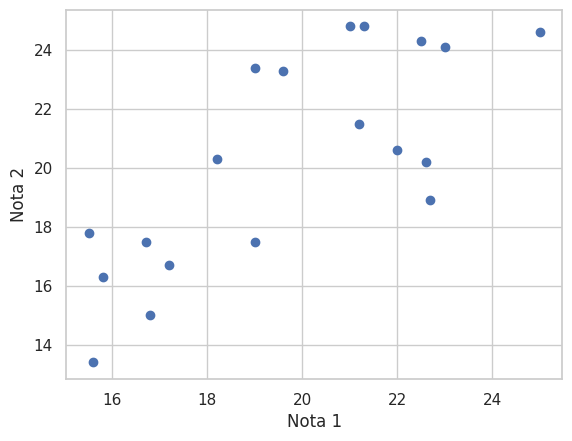

In [87]:
plt.scatter(notas['Nota1'], notas['Nota2'])
plt.xlabel("Nota 1")
plt.ylabel("Nota 2");

## Decomposição espectral: autovalores e autovetores

Obtendo da forma vista em álgebra linear

Usando a matriz de covariâncias **S**:

In [88]:
# garantir que autovalores ordenados em ordem decrescente
l, e = np.linalg.eig(S)
idx = np.argsort(l)[::-1]
l = l[idx]
e = e[:,idx]
print(l)
print(e)

[19.21049387  2.49371666]
[[-0.59822482 -0.80132831]
 [-0.80132831  0.59822482]]


Então, os componentes principais são:

\begin{align*}
  Y_1 = &  -0,6Nota1 -0,8Nota2\\
  Y_2 = & -0,8Nota1 + 0,6Nota2\\
\end{align*}

Verificar que a soma das variâncias de $\boldsymbol(Y)$ é igual à soma das variâncias de $\boldsymbol(X)$, ou seja, $\sum \lambda_i$ = $\sum S_{ii}$.

$\sum S_{ii}$

In [89]:
# soma das variâncias de X é o traço da matriz S
np.trace(S)

np.float64(21.70421052631579)

$\sum \lambda_i$

In [90]:
# soma das variâncias de Y é a soma dos autovalores
np.sum(l)

np.float64(21.704210526315794)

## ACP usando a matriz de covariâncias amostrais $\boldsymbol{S}$ - pacote *scikit-learn*

Usar $\boldsymbol{S}$ não é a melhor opção para a maioria dos casos.

In [91]:
# chamar o objeto de X para simplificar
X = notas

In [92]:
pca = PCA()
resultado_pca = pca.fit_transform(X)  # se a matriz de correlações R for usada, colocar scale(X) em vez de X
resultado = pd.DataFrame({'cp1': resultado_pca[:, 0], 'cp2': resultado_pca[:, 1]})

Os coeficientes dos componentes principais são dados pelos autovetores:

Cada linha é um componente principal (CP).

In [93]:
# coeficientes dos CPs (autovetores)
# cada linha é um CP
print(pca.components_)

[[ 0.59822482  0.80132831]
 [ 0.80132831 -0.59822482]]


Pode ser que os sinais fiquem trocados, por exemplo:

[[ 0.59822482  0.80132831]

 [ 0.80132831 -0.59822482]]

 O que resultaria em:
 \begin{align*}
  Y_1 = & 0,6Nota1 + 0,8Nota2\\
  Y_2 = & 0,8Nota1 - 0,6Nota2\\
\end{align*}

 ou

[[ -0.59822482 -0.80132831]

 [ -0.80132831 0.59822482]]

 O que resultaria em:
 \begin{align*}
  Y_1 = & -0,6Nota1 - 0,8Nota2\\
  Y_2 = & -0,8Nota1 + 0,6Nota2\\
\end{align*}

A interpretação será a mesma, as posições das observações é que vão mudar.


In [94]:
# variâncias dos CPs (autovalores)
pca.explained_variance_

array([19.21049387,  2.49371666])

Então as variâncias dos CPs são:

$V(Y_1) = 19,21$ (explica o máximo possível da variância total)  
$V(Y_2) = 2,49$

In [95]:
# variância explicada acumulada
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 88.51, 100.  ])

$Y_1$ explica 89% da variação total dos dados,  
$Y_1$ e $Y_2$ explicam juntas 100% da variação total.

In [96]:
notas

,Nota1,Nota2
0,17.2,16.7
1,16.8,15.0
2,25.0,24.6
3,19.0,17.5
4,21.0,24.8
5,15.6,13.4
6,19.0,23.4
7,22.5,24.3
8,18.2,20.3
9,16.7,17.5


In [97]:
# escores dos dois primeiros CPs
# são os novos valores das variáveis novas (Y1 e Y2)
resultado

,cp1,cp2
0,-4.363416,0.111379
1,-5.964964,0.807830
2,6.633232,1.635763
3,-2.645548,1.075190
4,4.400598,-1.689195
5,-7.964959,0.803395
6,2.082289,-2.454337
7,4.897271,-0.188090
8,-0.880409,-1.240902
9,-4.021465,-0.767865


In [98]:
# mostrar escores do CP1
# escores_pc1 = pd.DataFrame(data=resultado_pca[:, 0], columns=['CP1'])

# só mostrando os menores ou maiores escores do CP1 (ascending=True é para ordem crescente)
# (escores_pc1
#  .sort_values(by='CP1', ascending=True)
#  .loc[:,['CP1']]
#  .iloc[:20,:])

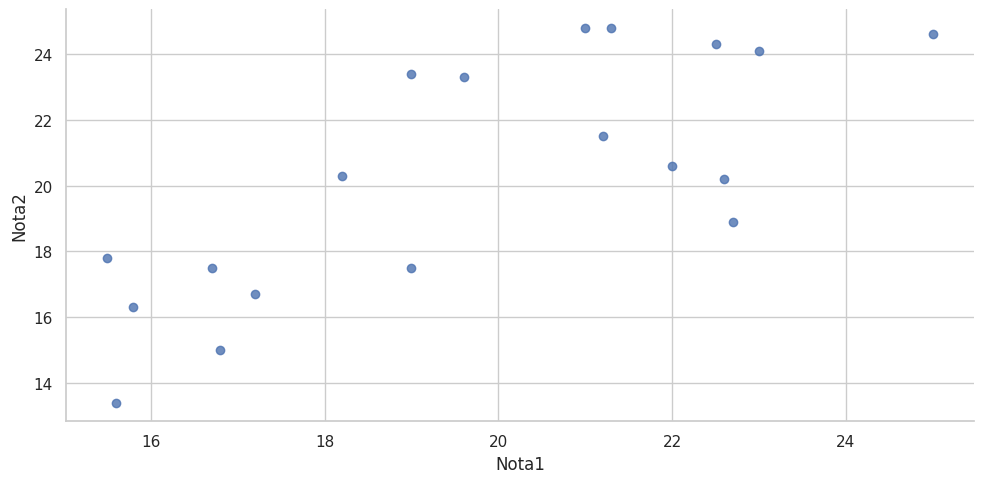

In [99]:
# diagrama de dispersão das duas primeiras variáveis
sns.lmplot(x='Nota1', y='Nota2', data=notas, fit_reg=False, aspect=2);

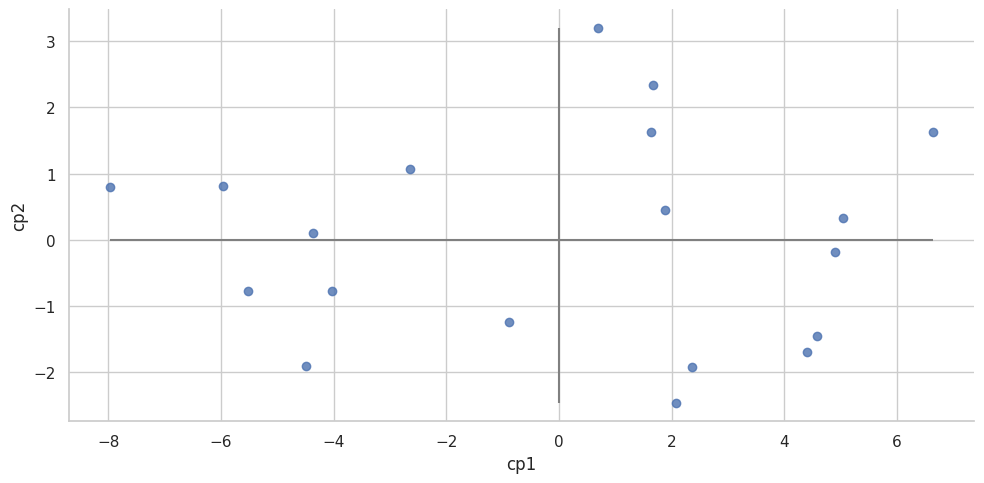

In [100]:
# diagrama de dispersão dos 2 primeiros CPs usando seaborn
sns.lmplot(x='cp1', y='cp2', data=resultado, fit_reg=False, aspect=2)
plt.hlines(0, resultado_pca[:, 0].min(), resultado_pca[:, 0].max(), color='gray')
plt.vlines(0, resultado_pca[:, 1].min(), resultado_pca[:, 1].max(), color='gray');

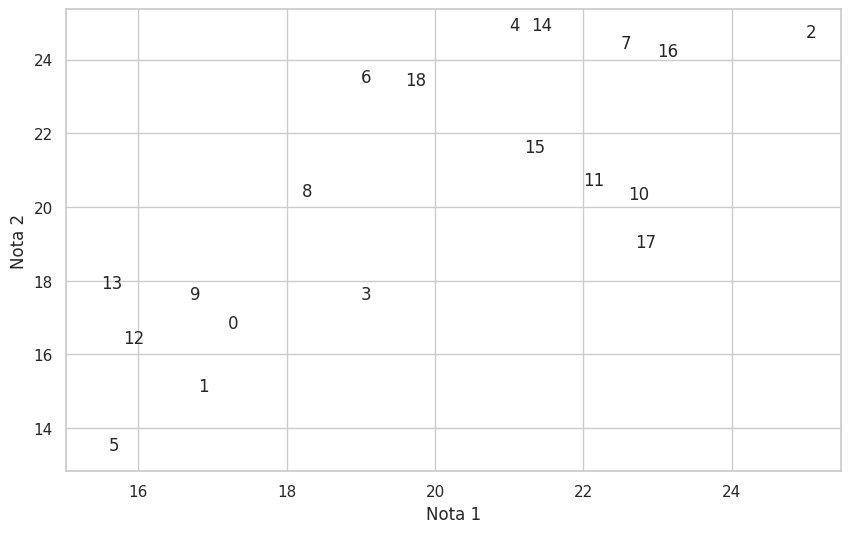

In [101]:
# diagrama de dispersão identificando os índices
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.scatter(notas['Nota1'], notas['Nota2'], s=0)
for i, txt in enumerate(notas.index):
    ax.annotate(txt, (notas['Nota1'][i], notas['Nota2'][i]))
plt.xlabel("Nota 1")
plt.ylabel("Nota 2");
# plt.hlines(0, resultado_pca[:, 0].min(), resultado_pca[:, 0].max(), color='gray')
# plt.vlines(0, resultado_pca[:, 1].min(), resultado_pca[:, 1].max(), color='gray');

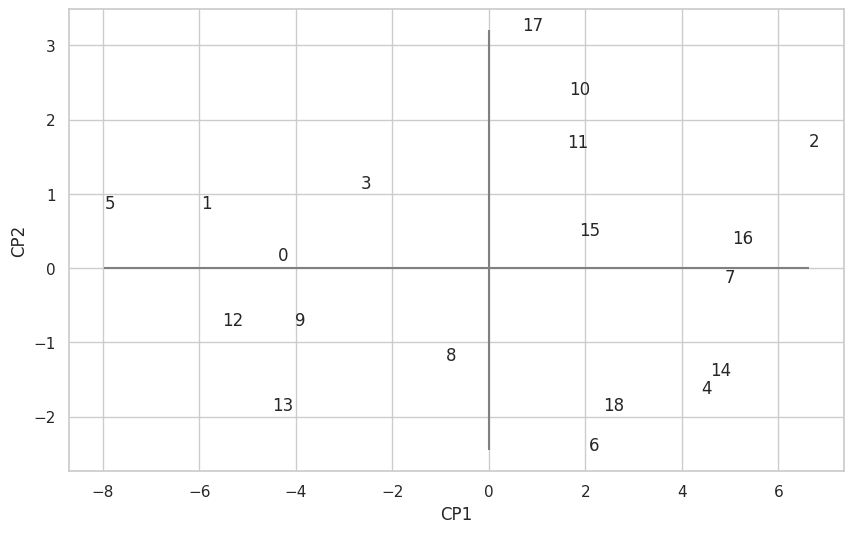

In [102]:
# diagrama de dispersão identificando os índices
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.scatter(resultado.cp1, resultado.cp2, s=0)
for i, txt in enumerate(resultado.index):
    ax.annotate(txt, (resultado.cp1[i], resultado.cp2[i]))
plt.xlabel("CP1")
plt.ylabel("CP2");
plt.hlines(0, resultado_pca[:, 0].min(), resultado_pca[:, 0].max(), color='gray')
plt.vlines(0, resultado_pca[:, 1].min(), resultado_pca[:, 1].max(), color='gray');

Alguns exemplos:

Para Y1 (CP1):
- Quem tirou as duas notas altas, vai tender a ter um escore alto do CP1: obs. 2, 7 e 16  
- Quem teve uma das notas alta e outra baixa, vai tender a ter um escore próximo de 0 do CP1 (parte central do gráfico em relação ao eixo x): obs. 6, 17, 18
- Quem tirou as duas notas mais baixas, vai tender a ter um escore baixo do CP1: obs. 0, 1, 5, 9, 12, 13

Para Y2 (CP2) (Porém, como o CP2 explica muito menos a variação dos dados, ele não terá interpretação muito útil):
- Quem tirou as duas notas altas, vai tender a ter um escore próximo de 0 do CP2 (parte central em relação ao eixo y, pois os coeficientes das duas notas têm sinais contrários, anulando-se): obs. 2, 7 e 16  
- Quem tirou Nota 1 alta e Nota 2 mais baixa, vai tender a ter um escore alto do CP2: obs. 17
- Quem tirou Nota 2 alta e Nota 1 mais baixa, vai tender a ter um escore baixo do CP2): obs. 6, 18


## ACP usando a matriz de correlações (mais indicada)

Usando a matriz de correlações **R**

In [103]:
# matriz de correlações
R = notas.corr()
R

,Nota1,Nota2
Nota1,1.000000,0.756797
Nota2,0.756797,1.000000


In [104]:
# autovalores e autovetores de R
l, e = np.linalg.eig(R)
idx = np.argsort(l)[::-1]
l = l[idx]
e = e[:,idx]
print(l)
print(e)

[1.75679738 0.24320262]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [105]:
# Lambda a partir de R
L = np.diag(l)
print(L)

[[1.75679738 0.        ]
 [0.         0.24320262]]


## Obtenção dos componentes principais (usando *scikit-learn*)

In [106]:
X = notas

In [107]:
# aplicar ACP usando a matriz de correlações
pca = PCA()
resultado_pca = pca.fit_transform(scale(X))   # scale(X) padroniza os dados, como se usássemos a matriz R

In [108]:
resultado = pd.DataFrame({'cp1':resultado_pca[:, 0], 'cp2':resultado_pca[:, 1]}, index=X.index)

In [109]:
# coeficientes dos CPs (autovetores)
# cada linha é um CP
pca.components_

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

Os componentes principais a partir da matriz de correlações são:

\begin{align*}
  Y_1 = & ~0,71*Z1 + 0,71*Z2\\
  Y_2 = & -0,71*Z1 + 0,71*Z2\\
\end{align*}

Obs.: Pode ser que os sinais sejam invertidos (Y1 = -0,71Z1 + -0,71Z2 e Y2 = 0,71Z1 - 0,71Z2)

No lugar de $X_1$ e $X_2$ usamos $Z_1$ e $Z_2$ para expressar que as variáveis são padronizadas.

In [110]:
# variâncias dos CPs (autovalores)
pca.explained_variance_

array([1.85439723, 0.25671388])

In [111]:
# variância explicada acumulada
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 87.84, 100.  ])

In [112]:
# os três primeiros CPs
print(pca.components_[0:3, :])

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


Interpretação:

Y1:
- escores altos representam os alunos com as duas notas (Nota1 e Nota2) altas
- escores altos na outra direção representam os alunos com notas mais baixas
- escores $≈0$ são alunos que foram melhor em uma das notas

Y2:
- escores altos positivos representam os alunos que tiveram nota 2 mais alta  
- escores altos negativos representam os alunos com nota 1 mais alta
- escores $≈0$ são alunos com as duas notas altas

In [113]:
# escores dos dois primeiros CPs
# resultado

## Análise gráfica dos componentes

### Gráfico da variância acumulada

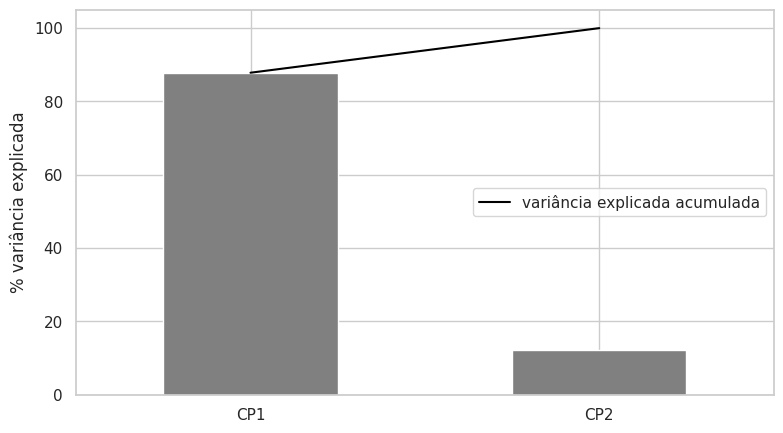

In [114]:
# variâncias acumuladas
tot = sum(pca.explained_variance_)
var_exp = [(i / tot)*100 for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
# número de CPs gerados (k = p)
cp =['CP'+str(i+1) for i in range(len(pca.components_))]
# dataframe com as variâncias acumuladas para criar o scree plot
df = pd.DataFrame({'cp': cp, 'var_exp': var_exp, 'cum_var_exp': cum_var_exp})
# scree plot com %
fig, ax = plt.subplots(figsize=(9,5))
df.plot.bar('cp', 'var_exp', color='gray', ax=ax, legend=False)
df.plot.line('cp', 'cum_var_exp', color='black', ax=ax)
plt.legend(labels=['variância explicada acumulada'],
           loc='center right',)
plt.ylabel('% variância explicada')
plt.xlabel('');

### *Scree plot*

O *Scree plot* é um gráfico com os autovalores de cada componente

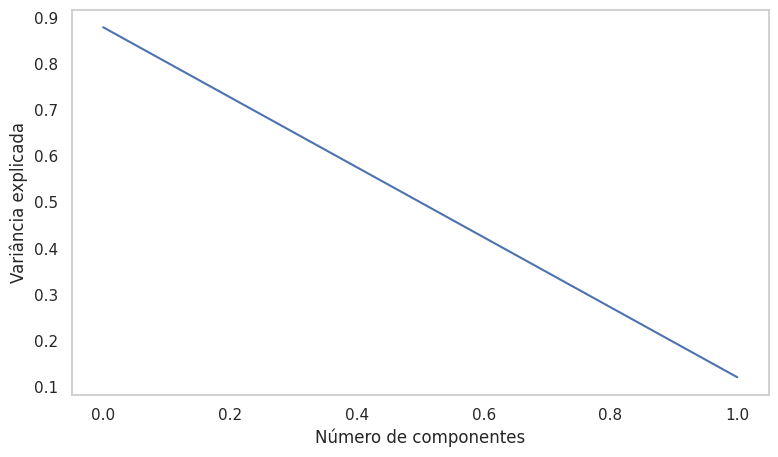

In [115]:
plt.figure(figsize=(9,5))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Número de componentes')
plt.ylabel('Variância explicada')
plt.grid()
plt.show()

É possível ver pelo gráfico que o primeiro componente explica quase 90% da variância dos dados.

### Diagrama de dispersão entre CP1 e CP2

Nesse gráfico vamos visualizar a relação entre os dois primeiros CPs.

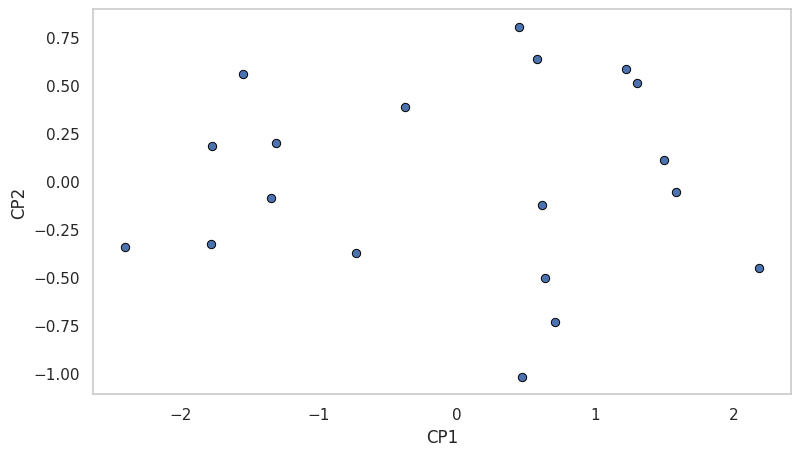

In [116]:
plt.figure(figsize=(9,5))
plt.scatter(resultado_pca[:, 0], resultado_pca[:, 1], edgecolors='black', linewidths=.7);
plt.xlabel('CP1')
plt.ylabel('CP2')
plt.grid();

### Efeito das variaveis em cada componente

O atributo 'components_' nos dá os autovetores que representam a direção de máxima variância dos dados. Ao verificar a correlação dos componentes com as variáveis originais podemos ver a influência que cada variável tem sobre os componentes.

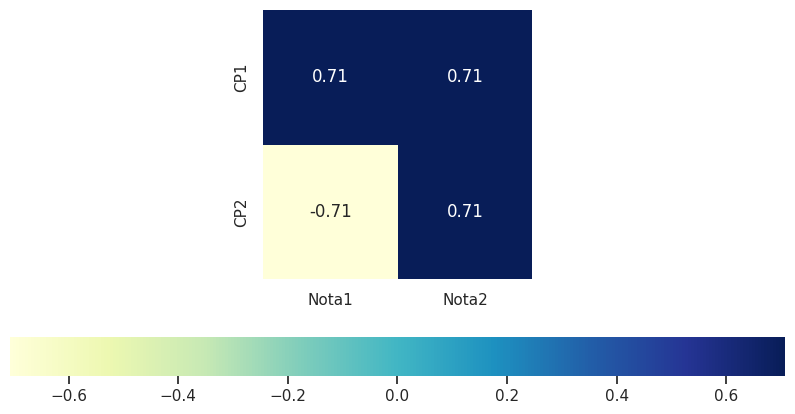

In [117]:
plt.figure(figsize=(10, 5))
ax = sns.heatmap(pca.components_,
                 annot=True,
                 cmap='YlGnBu',
                 yticklabels=[ "CP"+str(X) for X in range(1,pca.n_components_+1)],
                 xticklabels=list(X.columns),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")

### ACP *Biplot*

Biplot é um gráfico interessante e contém muitas informações úteis.

Ele contém dois gráficos:

1. * Gráfico de dispersão do ACP * que mostra os dois primeiros componentes (já traçamos isso acima)
2. * Gráfico de autovetores do ACP * que mostra a intensidade com que cada característica influencia um componente principal.

**PCA Loading Plot:** Todos os vetores começam na origem e seus valores projetados nos componentes explicam quanto peso eles têm naquele componente. Além disso, os ângulos entre vetores individuais informam sobre a correlação entre eles.

Mais sobre o biplot [aqui] (http://www.nonlinear.com/support/progenesis/comet/faq/v2.0/pca.aspx)

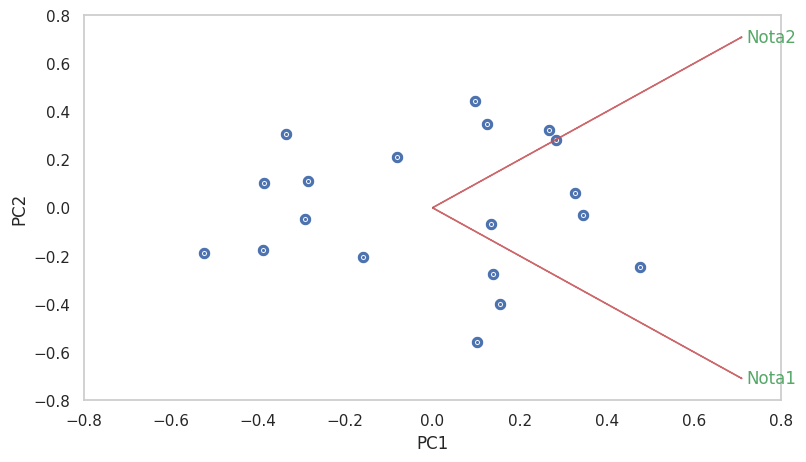

In [118]:
fig, ax = plt.subplots(figsize=(9,5))
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley,s=5, linewidths = 6)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.8)
        if labels is None:
            plt.text(coeff[i,0]* 1.1, coeff[i,1] * 1, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.1, coeff[i,1] * 1, labels[i], color = 'g', ha = 'center', va = 'center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    ax.set(xlim=(-0.8, 0.8), ylim=(-0.8, 0.8))
    plt.grid()

myplot(resultado_pca[:,0:2],np.transpose(pca.components_[0:2, :]),list(X.columns))
plt.show()

Lembrando da interpretação:

Se os sinais ficaram da seguinte forma:

\begin{align*}
  Y_1 = & 0,71*Z1 + 0,71*Z2\\
  Y_2 = & -0,71*Z1 + 0,71*Z2\\
\end{align*}

Y1:
- escores altos positivos representam os alunos com as duas notas (Nota1 e Nota2) altas
- escores altos negativos representam os alunos com notas mais baixas
- escores $≈0$ são alunos que foram melhor em uma das notas

Y2:
- escores altos positivos representam os alunos que tiveram nota 2 mais alta  
- escores altos negativos representam os alunos com nota 1 mais alta
- escores $≈0$ são alunos com as duas notas altas

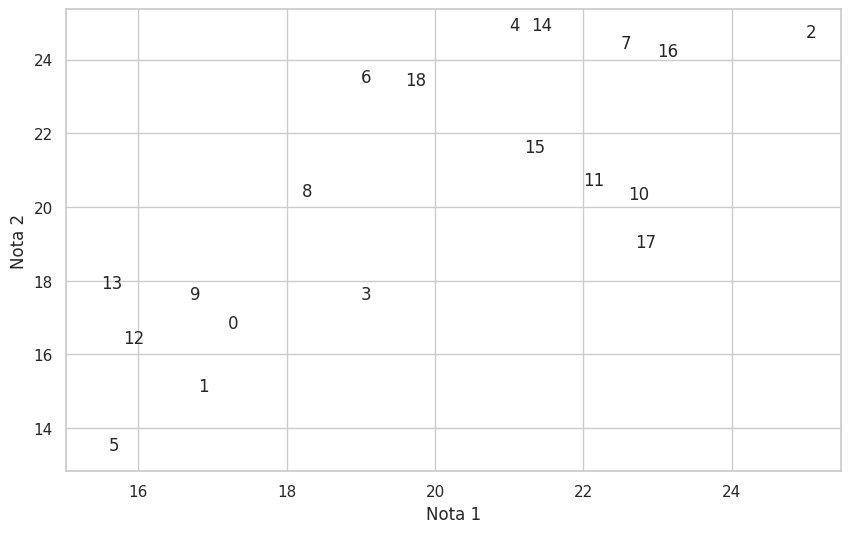

In [119]:
# diagrama de dispersão dos dados originais identificando os índices
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.scatter(notas['Nota1'], notas['Nota2'], s=0)
for i, txt in enumerate(notas.index):
    ax.annotate(txt, (notas['Nota1'][i], notas['Nota2'][i]))
plt.xlabel("Nota 1")
plt.ylabel("Nota 2");

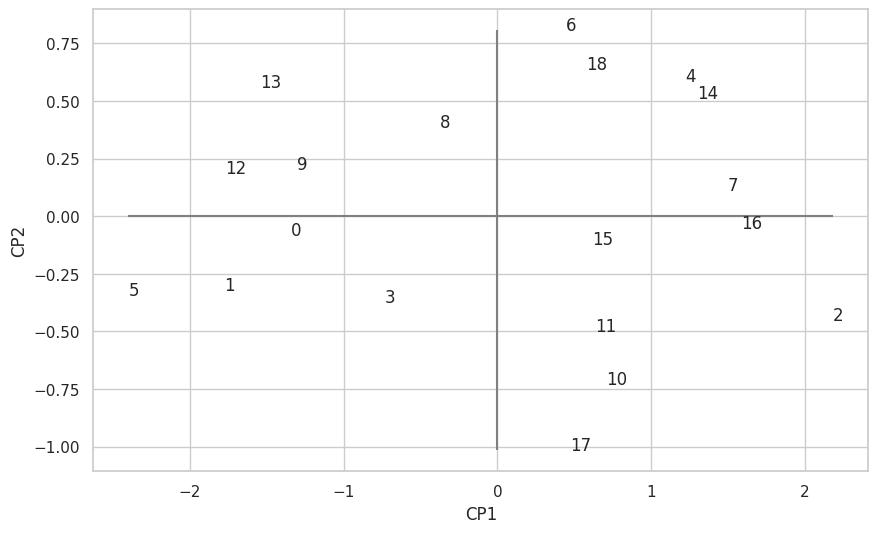

In [120]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.scatter(resultado.cp1, resultado.cp2, s=0)
for i, txt in enumerate(resultado.index):
    ax.annotate(txt, (resultado.cp1[i], resultado.cp2[i]))
plt.hlines(0, resultado_pca[:, 0].min(), resultado_pca[:, 0].max(), color='gray')
plt.vlines(0, resultado_pca[:, 1].min(), resultado_pca[:, 1].max(), color='gray')
plt.xlabel('CP1')
plt.ylabel('CP2');

# Dados das empresas

Dados de doze empresas e 3 variáveis - exemplo de MINGOTI (2005). Vamos criar o *dataframe* usando a função *DataFrame* do *pandas*. Poderíamos também ter os dados salvos em uma planilha e carregá-los.

In [121]:
# ganho bruto - B (X1)
# ganho líquido - L (X2)
# patrimônio acumulado - P (X3)
emp = pd.DataFrame({'B': [9893, 8776, 13572, 6455, 5129, 5432, 3807, 3423, 3708, 3294, 5433, 6287],
                  'L': [564, 389, 1103, 743, 203, 215, 385, 187, 127, 297, 432, 451],
                  'P': [17689, 17359, 18597, 8745, 14397, 3467, 4679, 6754, 2275, 6754, 5589, 8972]})
emp

,B,L,P
0,9893,564,17689
1,8776,389,17359
2,13572,1103,18597
3,6455,743,8745
4,5129,203,14397
5,5432,215,3467
6,3807,385,4679
7,3423,187,6754
8,3708,127,2275
9,3294,297,6754


In [122]:
# resumo do conjunto de dados
emp.describe()

,B,L,P
count,12.000000,12.000000,12.000000
mean,6267.416667,424.666667,9606.416667
std,3090.405900,276.169360,5865.842906
min,3294.000000,127.000000,2275.000000
25%,3782.250000,212.000000,5361.500000
50%,5432.500000,387.000000,7749.500000
75%,7035.250000,479.250000,15137.500000
max,13572.000000,1103.000000,18597.000000


In [123]:
# obter n
n = emp.shape[0]
n

12

In [124]:
# obter p
p = emp.shape[1]
p

3

In [125]:
# vetor de médias
emp.mean()

,0
B,6267.416667
L,424.666667
P,9606.416667


In [126]:
# matriz de covariâncias
S = emp.cov()
S

,B,L,P
B,9.550609e+06,706121.060606,1.497823e+07
L,7.061211e+05,76269.515152,9.339151e+05
P,1.497823e+07,933915.060606,3.440811e+07


In [127]:
# matriz de correlações
R = emp.corr()
R

,B,L,P
B,1.000000,0.827348,0.826256
L,0.827348,1.000000,0.576503
P,0.826256,0.576503,1.000000


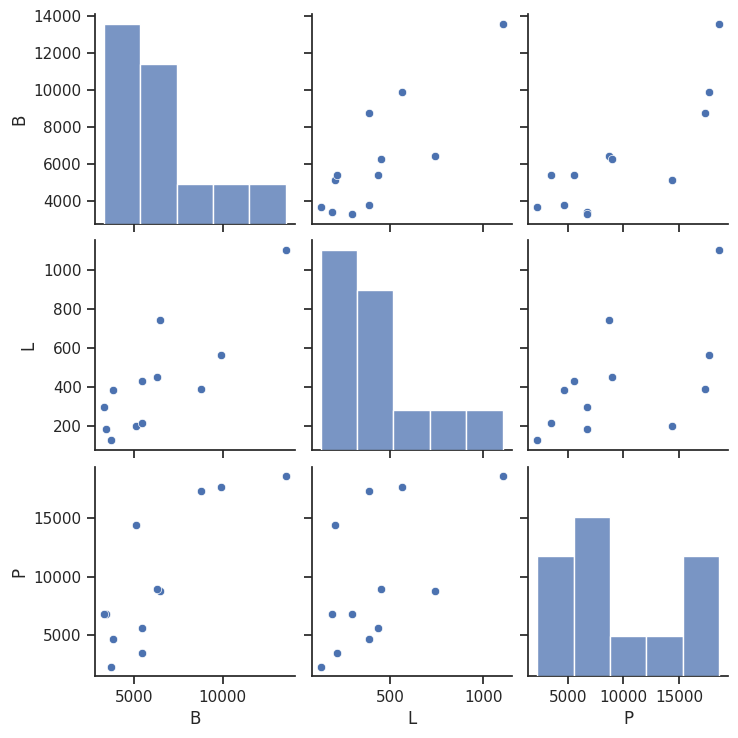

In [128]:
sns.set(style='ticks')
sns.pairplot(emp);

### Decomposição espectral: autovalores e autovetores

Obtendo da forma vista em álgebra linear

Usando a matriz de covariâncias **S**:

In [129]:
# ordem decrescente
l, e = np.linalg.eig(S)
idx = np.argsort(l)[::-1]
l = l[idx]
e = e[:,idx]
print(l)
print(e)

[4.14743915e+07 2.53950713e+06 2.10925256e+04]
[[ 0.42509725  0.8997068   0.09909593]
 [ 0.02766083  0.09651661 -0.99494694]
 [ 0.90472493 -0.42569029 -0.01614231]]


Verificar que a soma das variâncias de $\boldsymbol(Y)$ é igual à soma das variâncias de $\boldsymbol(X)$, ou seja, $\sum \lambda_i$ = $\sum S_{ii}$.

$\sum S_{ii}$

In [130]:
# soma das variâncias de X é o traço da matriz S
np.trace(S)

np.float64(44034991.13636364)

$\sum \lambda_i$

In [131]:
# soma das variâncias de Y é a soma dos autovalores
np.sum(l)

np.float64(44034991.13636364)

## ACP usando a matriz de covariâncias amostrais $\boldsymbol{S}$

Não é a melhor opção para a maioria dos casos.

Primeiro faremos a análise de componentes principais usando a matriz de covariâncias, mas essa não é a melhor opção na maior parte das situações. Isso ocorre porque algumas variáveis tendem a ter variâncias muito maiores do que outras e acabam dominando a análise.

In [132]:
X = emp

Usando o pacote *scikit-learn*

In [133]:
pca = PCA()
resultado_pca = pca.fit_transform(X)  # se a matriz de correlações R for usada, colocar scale(X) em vez de X
resultado = pd.DataFrame({'cp1': resultado_pca[:, 0], 'cp2': resultado_pca[:, 1]})

Os coeficientes dos componentes principais são dados pelos autovetores:

In [134]:
# coeficientes dos CPs (autovetores)
# cada linha é um CP
pca.components_

array([[ 0.42509725,  0.02766083,  0.90472493],
       [ 0.8997068 ,  0.09651661, -0.42569029],
       [-0.09909593,  0.99494694,  0.01614231]])

Então, os componentes principais são:

\begin{align*}
  Y_1 = &  0,43B + 0,03L + 0,90P\\
  Y_2 = & -0,90B - 0,10L + 0,43P\\
  Y_3 = & -0,10B + 0,99L + 0,02P\\
\end{align*}


Lembre-se: os sinais podem estar invertidos. Isso só afetará a interpretação.

In [135]:
# variâncias dos CPs (autovalores)
pca.explained_variance_

array([4.14743915e+07, 2.53950713e+06, 2.10925256e+04])

Então as variâncias dos CPs são:

$V(Y_1) = 41.474.391,5$ (explica o máximo possível da variância total)  
$V(Y_2) = 2.539.507,13$  
$V(Y_3) = 21.092,525$

In [136]:
# variância explicada acumulada
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 94.19,  99.96, 100.01])

$Y_1$ explica 94,19% da variação total dos dados,  
$Y_1$ e $Y_2$ explicam juntos 99,96% da variação total,  
$Y_1$, $Y_2$ e $Y_3$ explicam juntos 100% da variação dos dados.

In [137]:
# escores dos dois primeiros CPs
# são os novos valores das variáveis novas (Y1 e Y2)
resultado

,cp1,cp2
0,8857.594255,-165.267260
1,8079.360752,-1046.652367
2,11257.926468,2810.249726
3,-690.798614,566.191163
4,3844.090910,-3084.940522
5,-5915.416219,1841.623669
6,-5504.970291,-119.928682
7,-3796.380242,-1367.833726
8,-7729.150154,789.458508
9,-3848.175097,-1473.279076


In [138]:
# mostrar escores do CP1
# escores_pc1 = pd.DataFrame(data=resultado_pca[:, 0], columns=['CP1'])
# só mostrando os menores ou maiores escores do CP1 (ascending=True é para ordem crescente)
# (escores_pc1
#  .sort_values(by='CP1', ascending=True)
#  .loc[:,['CP1']]
#  .iloc[:20,:])

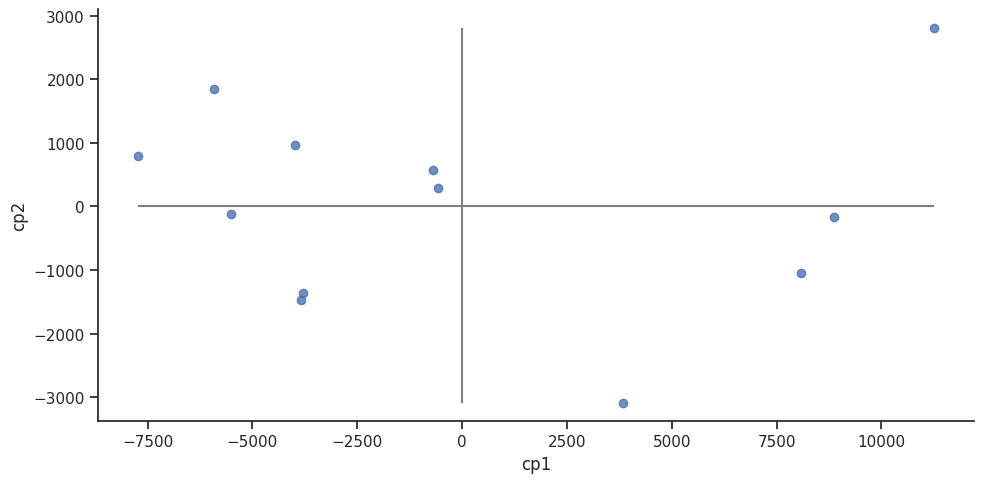

In [139]:
# diagrama de dispersão dos 2 primeiros CPs usando seaborn
sns.lmplot(x='cp1', y='cp2', fit_reg=False, data=resultado, aspect=2)
plt.hlines(0, resultado_pca[:, 0].min(), resultado_pca[:, 0].max(), color='gray')
plt.vlines(0, resultado_pca[:, 1].min(), resultado_pca[:, 1].max(), color='gray');

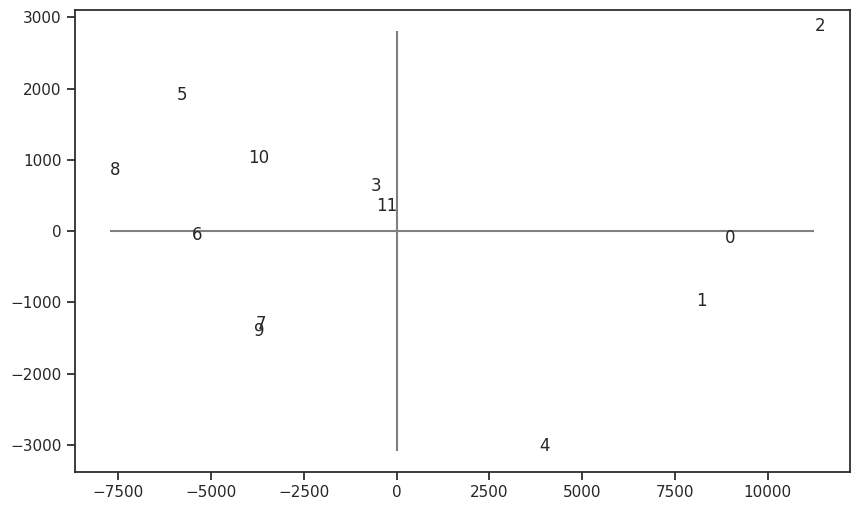

In [140]:
# diagrama de dispersão identificando os índices
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.scatter(resultado.cp1, resultado.cp2, s=0)
for i, txt in enumerate(resultado.index):
    ax.annotate(txt, (resultado.cp1[i], resultado.cp2[i]))
plt.hlines(0, resultado_pca[:, 0].min(), resultado_pca[:, 0].max(), color='gray')
plt.vlines(0, resultado_pca[:, 1].min(), resultado_pca[:, 1].max(), color='gray');

## **Mais indicada**: ACP usando a matriz de correlações amostrais **R**

Usando a matriz de correlações (mais indicada):

Obtenção dos componentes principais (usando *scikit-learn*)

In [141]:
X = emp

Aqui poderíamos usar a matriz R diretamente ou usar scale(X) que dá na mesma

In [142]:
# aplicar ACP usando a matriz de correlações
pca = PCA()
resultado_pca = pca.fit_transform(scale(X))   # scale(X) padroniza os dados, como se usássemos a matriz R

In [143]:
resultado = pd.DataFrame({'cp1':resultado_pca[:, 0], 'cp2':resultado_pca[:, 1]}, index=X.index)

In [144]:
# coeficientes dos CPs (autovetores)
# cada linha é um CP
pca.components_

array([[ 0.61670267,  0.55679445,  0.556469  ],
       [-0.00126721, -0.70619694,  0.70801432],
       [ 0.78719515, -0.43733949, -0.43480796]])

In [145]:
# variâncias dos CPs (autovalores)
pca.explained_variance_

array([2.71912594, 0.46199796, 0.09160337])

In [146]:
# variância explicada acumulada
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 83.08,  97.2 , 100.  ])

In [147]:
# os três primeiros CPs
print(pca.components_[0:3, :])

[[ 0.61670267  0.55679445  0.556469  ]
 [-0.00126721 -0.70619694  0.70801432]
 [ 0.78719515 -0.43733949 -0.43480796]]


In [148]:
X.columns

Index(['B', 'L', 'P'], dtype='object')

Então, os componentes principais a partir da matriz de correlações são:

\begin{align*}
  Y_1 = &  0,62Z_1 + 0,56Z_2 + 0,56Z_3\\
  Y_2 = & -0,00Z_1 - 0,71Z_2 + 0,71Z_3\\
  Y_3 = & 0,79Z_1 - 0,44Z_2 - 0,43Z_3\\
\end{align*}

Sendo $Z_1$, $Z_2$ e $Z_3$ as versões padronizadas de $B$, $L$ e $P$.
Variâncias explicadas pelo $1^o$ CP: 83,08\%; $1^o + 2^0$ CP: 97,2\%; $1^o + 2^o + 3^o$: 100\%.

Interpretação:

- Y1: índice de desempenho global da empresa (valores altos positivos indicam empresas que tiveram ganhos B, L e P maiores do que a média).
- Y2: comparação entre L e P (valores ~ 0 indicam empresas em que L está em equilíbrio com P).
- Y3: comparação de B com o índice composto por L e P (representa pouco da variação total, mas pode ser de interesse para o pesquisador).

Lembre-se: usando a matriz de covariâncias, os componentes principais foram:
\begin{align*}
  Y_1 = &  0,43B + 0,03L + 0,90P\\
  Y_2 = & -0,90B - 0,10L + 0,43P\\
  Y_3 = & -0,10B + 0,99L + 0,02P\\
\end{align*}
Variâncias explicadas pelo $1^o$ CP: 94,19\%; $1^o + 2^0$ CP: 99,96\%; $1^o + 2^o + 3^o$: 100\%.

In [149]:
# escores dos dois primeiros CPs
# resultado

## Análise gráfica dos componentes

### Gráfico da variância acumulada

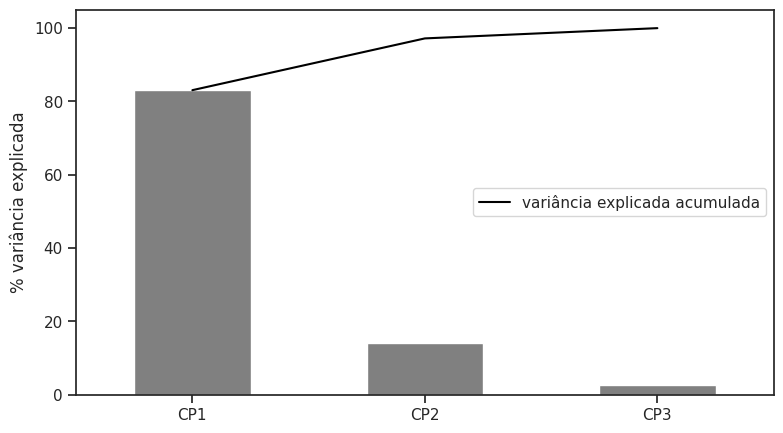

In [150]:
# variâncias acumuladas
tot = sum(pca.explained_variance_)
var_exp = [(i / tot)*100 for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
# número de CPs gerados (k = p)
cp =['CP'+str(i+1) for i in range(len(pca.components_))]
# dataframe com as variâncias acumuladas para criar o scree plot
df = pd.DataFrame({'cp': cp, 'var_exp': var_exp, 'cum_var_exp': cum_var_exp})
# scree plot com %
fig, ax = plt.subplots(figsize=(9,5))
df.plot.bar('cp', 'var_exp', color='gray', ax=ax, legend=False)
df.plot.line('cp', 'cum_var_exp', color='black', ax=ax)
plt.legend(labels=['variância explicada acumulada'],
           loc='center right',)
plt.ylabel('% variância explicada')
plt.xlabel('');

### *Scree plot*

O *Scree plot* é um gráfico com os autovalores de cada componente

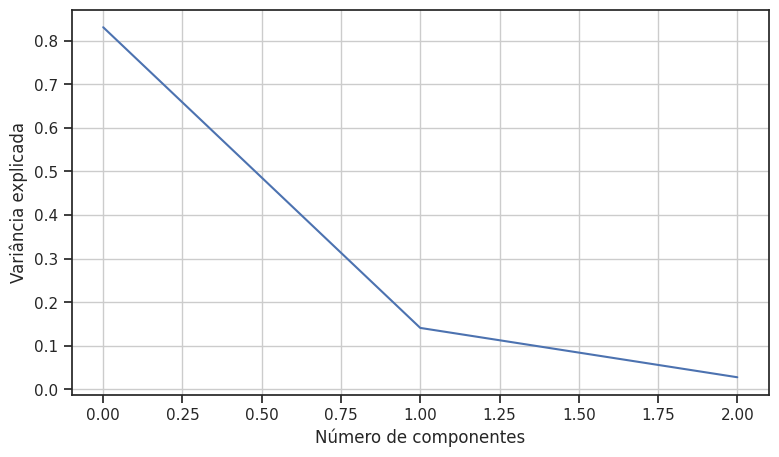

In [151]:
plt.figure(figsize=(9,5))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Número de componentes')
plt.ylabel('Variância explicada')
plt.grid()
plt.show()

É possível ver pelo gráfico que o primeiro componente explica mais  de $80\%$ da variância dos dados.

### Diagrama de dispersão entre CP1 e CP2

Nesse gráfico vamos visualizar a relação entre os dois primeiros CPs.

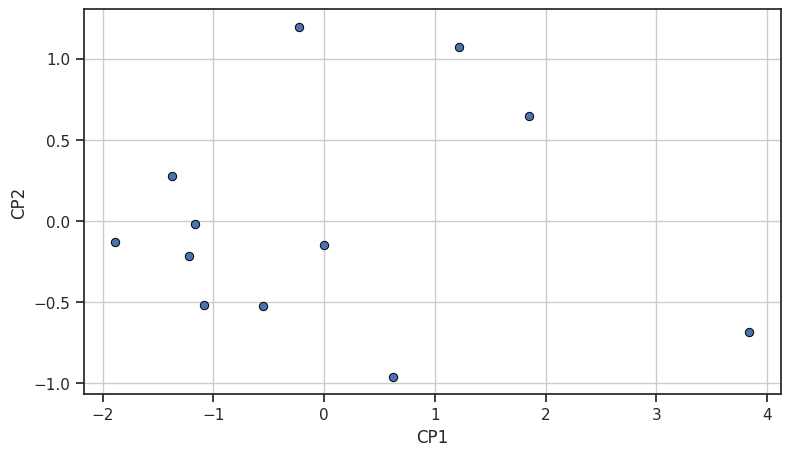

In [152]:
plt.figure(figsize=(9,5))
plt.scatter(resultado_pca[:, 0], resultado_pca[:, 1], edgecolors='black', linewidths=.7);
plt.xlabel('CP1')
plt.ylabel('CP2')
plt.grid();

### Efeito das variáveis em cada componente

O atributo 'components_' nos dá os autovetores que representam a direção de máxima variância dos dados. Ao verificar a correlação dos componentes com as variáveis originais podemos ver a influência que cada variável tem sobre os componentes.

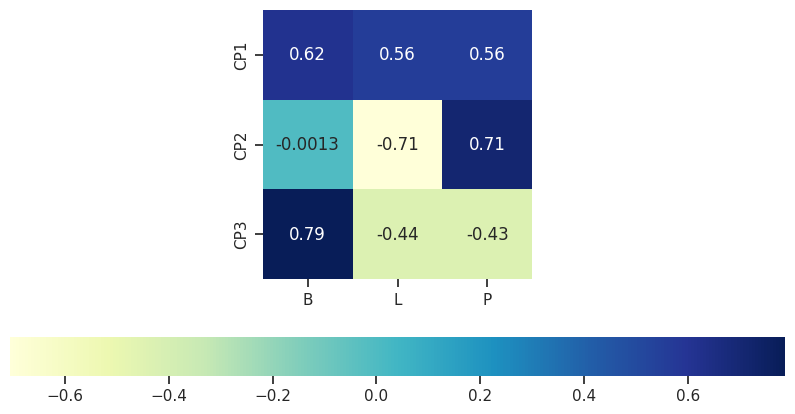

In [153]:
plt.figure(figsize=(10, 5))
ax = sns.heatmap(pca.components_,
                 annot=True,
                 cmap='YlGnBu',
                 yticklabels=[ "CP"+str(X) for X in range(1,pca.n_components_+1)],
                 xticklabels=list(X.columns),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")

### ACP *Biplot*

Biplot é um gráfico interessante e contém muitas informações úteis.

Ele contém dois gráficos:

1. * Gráfico de dispersão do ACP * que mostra os dois primeiros componentes (já traçamos isso acima)
2. * Gráfico de autovetores do ACP * que mostra a intensidade com que cada característica influencia um componente principal.

**PCA Loading Plot:** Todos os vetores começam na origem e seus valores projetados nos componentes explicam quanto peso eles têm naquele componente. Além disso, os ângulos entre vetores individuais informam sobre a correlação entre eles.

Mais sobre o biplot [aqui] (http://www.nonlinear.com/support/progenesis/comet/faq/v2.0/pca.aspx)

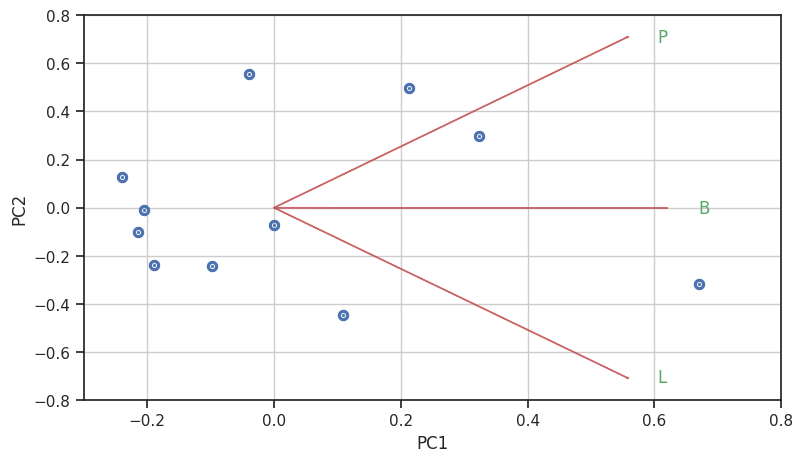

In [154]:
fig, ax = plt.subplots(figsize=(9,5))
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley,s=5, linewidths = 6)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.8)
        if labels is None:
            plt.text(coeff[i,0]* 1.1, coeff[i,1] * 1, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.1, coeff[i,1] * 1, labels[i], color = 'g', ha = 'center', va = 'center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    ax.set(xlim=(-0.3, 0.8), ylim=(-0.8, 0.8))
    plt.grid()

myplot(resultado_pca[:,0:2],np.transpose(pca.components_[0:2, :]),list(X.columns))
plt.show()

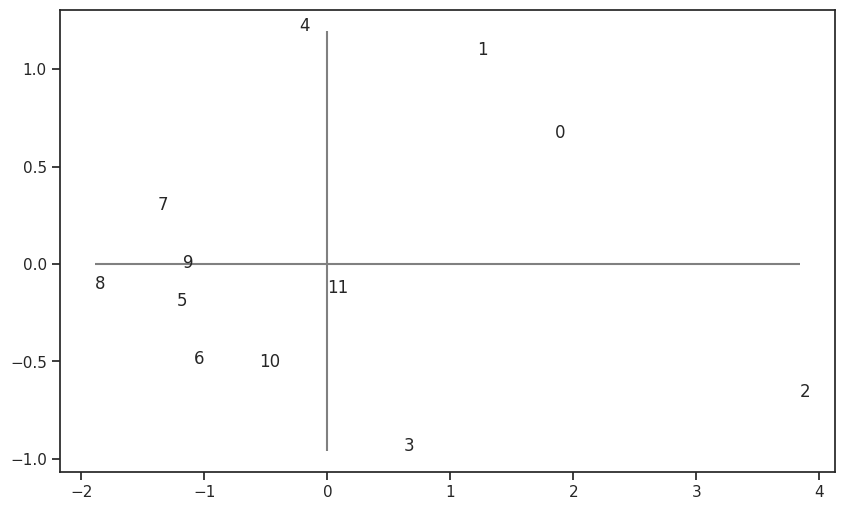

In [155]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.scatter(resultado.cp1, resultado.cp2, s=0)
for i, txt in enumerate(resultado.index):
    ax.annotate(txt, (resultado.cp1[i], resultado.cp2[i]))
plt.hlines(0, resultado_pca[:, 0].min(), resultado_pca[:, 0].max(), color='gray')
plt.vlines(0, resultado_pca[:, 1].min(), resultado_pca[:, 1].max(), color='gray');

In [156]:
# dados originais
X

,B,L,P
0,9893,564,17689
1,8776,389,17359
2,13572,1103,18597
3,6455,743,8745
4,5129,203,14397
5,5432,215,3467
6,3807,385,4679
7,3423,187,6754
8,3708,127,2275
9,3294,297,6754


Lembrando a interpretação ja realizada:

- Y1: índice de desempenho global da empresa (valores altos positivos indicam empresas que tiveram ganhos B, L e P maiores do que a média)
- Y2: comparação entre L e P (valores ~ 0 indicam empresas em que L está em equilíbrio com P)
